In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from micromlgen import port
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('DataSetHari3.csv')
print(df.shape)
df.head()

(214, 5)


,Kelembapan,Suhu,EC,pH,Label
0,21.53,25.75,61,6.36,Jagung
1,21.53,25.75,61,6.32,Jagung
2,21.53,25.75,61,6.32,Jagung
3,22.24,25.75,61,6.32,Jagung
4,21.80,25.75,61,6.32,Jagung


In [7]:
X=df.drop(['Label'],axis=1)
X

,Kelembapan,Suhu,EC,pH
0,21.53,25.75,61,6.36
1,21.53,25.75,61,6.32
2,21.53,25.75,61,6.32
3,22.24,25.75,61,6.32
4,21.80,25.75,61,6.32
...,...,...,...,...
209,24.51,20.50,66,6.38
210,25.00,20.50,66,6.38
211,24.83,20.50,66,6.38
212,24.83,20.50,66,6.38


In [8]:
y=df['Label']
y

0      Jagung
1      Jagung
2      Jagung
3      Jagung
4      Jagung
        ...  
209     Tomat
210     Tomat
211     Tomat
212     Tomat
213     Tomat
Name: Label, Length: 214, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['Label'] = enc.fit_transform(df['Label'])
df.head()

,Kelembapan,Suhu,EC,pH,Label
0,21.53,25.75,61,6.36,1
1,21.53,25.75,61,6.32,1
2,21.53,25.75,61,6.32,1
3,22.24,25.75,61,6.32,1
4,21.80,25.75,61,6.32,1


In [11]:
#Setelah label diubah menjadi angka
y=df['Label']
y

0      1
1      1
2      1
3      1
4      1
      ..
209    6
210    6
211    6
212    6
213    6
Name: Label, Length: 214, dtype: int32

In [12]:
df['Label'].unique()

array([1, 4, 5, 2, 0, 3, 6])

In [13]:
enc.classes_

array(['Cabe', 'Jagung', 'Jeruk', 'Pakcoi', 'Rosemari', 'Selada', 'Tomat'],
      dtype=object)

In [14]:
print("Mapping Tanaman (data)")
for i, tanaman in enumerate(enc.classes_):
    print(tanaman, "=", i)

Mapping Tanaman (data)
Cabe = 0
Jagung = 1
Jeruk = 2
Pakcoi = 3
Rosemari = 4
Selada = 5
Tomat = 6


In [16]:
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])
class_2 = np.array(X[y==2])
class_3 = np.array(X[y==3])
class_4 = np.array(X[y==4])
class_5 = np.array(X[y==5])
class_6 = np.array(X[y==6])

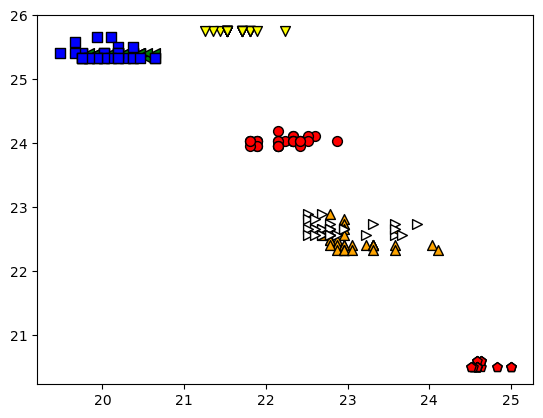

In [17]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=50, facecolors='red', edgecolors='black', linewidths=1, marker='o', label='Cabai')
plt.scatter(class_1[:, 0], class_1[:, 1], s=50, facecolors='yellow', edgecolors='black', linewidths=1, marker='v', label='Jagung')
plt.scatter(class_2[:, 0], class_2[:, 1], s=50, facecolors='orange', edgecolors='black', linewidths=1, marker='^', label='Jeruk')
plt.scatter(class_3[:, 0], class_3[:, 1], s=50, facecolors='green', edgecolors='black', linewidths=1, marker='<', label='Pakcoi')
plt.scatter(class_4[:, 0], class_4[:, 1], s=50, facecolors='white', edgecolors='black', linewidths=1, marker='>', label='Rosemari')
plt.scatter(class_5[:, 0], class_5[:, 1], s=50, facecolors='blue', edgecolors='black', linewidths=1, marker='s', label='Selada')
plt.scatter(class_6[:, 0], class_6[:, 1], s=50, facecolors='red', edgecolors='black', linewidths=1, marker='p', label='Tomat')

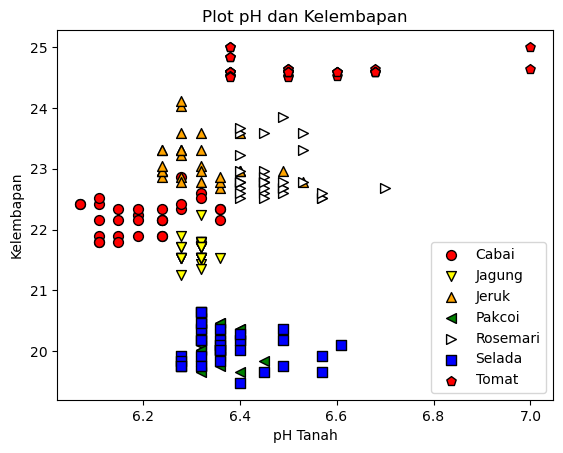

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.scatter(class_0[:, 3], class_0[:, 0], 
            s=50, facecolors='red', edgecolors='black', 
            linewidths=1, marker='o', label='Cabai')
plt.scatter(class_1[:, 3], class_1[:, 0], 
            s=50, facecolors='yellow', edgecolors='black', 
            linewidths=1, marker='v', label='Jagung')
plt.scatter(class_2[:, 3], class_2[:, 0], 
            s=50, facecolors='orange', edgecolors='black', 
            linewidths=1, marker='^', label='Jeruk')
plt.scatter(class_3[:, 3], class_3[:, 0], 
            s=50, facecolors='green', edgecolors='black', 
            linewidths=1, marker='<', label='Pakcoi')
plt.scatter(class_4[:, 3], class_4[:, 0], 
            s=50, facecolors='white', edgecolors='black', 
            linewidths=1, marker='>', label='Rosemari')
plt.scatter(class_5[:, 3], class_5[:, 0], 
            s=50, facecolors='blue', edgecolors='black', 
            linewidths=1, marker='s', label='Selada')
plt.scatter(class_6[:, 3], class_6[:, 0], 
            s=50, facecolors='red', edgecolors='black', 
            linewidths=1, marker='p', label='Tomat')
ax.set_xlabel('pH Tanah')
ax.set_ylabel('Kelembapan')
ax.set_title('Plot pH dan Kelembapan')
ax.legend(loc='lower right')


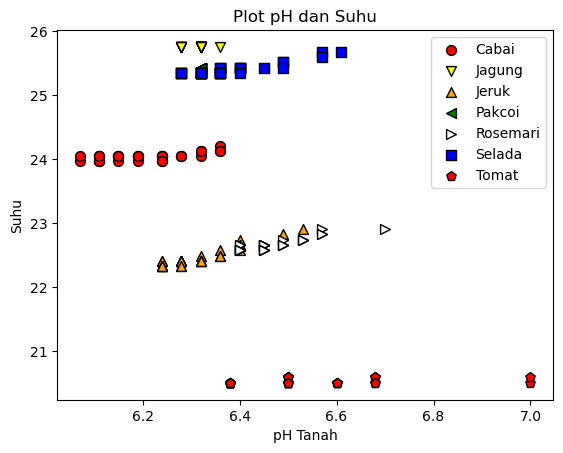

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.scatter(class_0[:, 3], class_0[:, 1], 
            s=50, facecolors='red', edgecolors='black', 
            linewidths=1, marker='o', label='Cabai')
plt.scatter(class_1[:, 3], class_1[:, 1], 
            s=50, facecolors='yellow', edgecolors='black', 
            linewidths=1, marker='v', label='Jagung')
plt.scatter(class_2[:, 3], class_2[:, 1], 
            s=50, facecolors='orange', edgecolors='black', 
            linewidths=1, marker='^', label='Jeruk')
plt.scatter(class_3[:, 3], class_3[:, 1], 
            s=50, facecolors='green', edgecolors='black', 
            linewidths=1, marker='<', label='Pakcoi')
plt.scatter(class_4[:, 3], class_4[:, 1], 
            s=50, facecolors='white', edgecolors='black', 
            linewidths=1, marker='>', label='Rosemari')
plt.scatter(class_5[:, 3], class_5[:, 1], 
            s=50, facecolors='blue', edgecolors='black', 
            linewidths=1, marker='s', label='Selada')
plt.scatter(class_6[:, 3], class_6[:, 1], 
            s=50, facecolors='red', edgecolors='black', 
            linewidths=1, marker='p', label='Tomat')
ax.set_xlabel('pH Tanah')
ax.set_ylabel('Suhu')
ax.set_title('Plot pH dan Suhu')
ax.legend(loc='upper right')


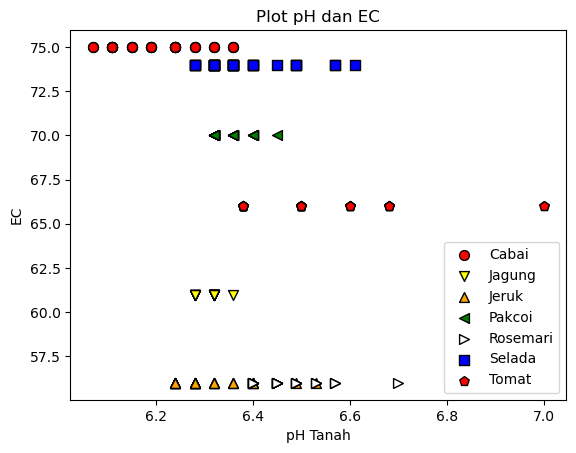

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.scatter(class_0[:, 3], class_0[:, 2], 
            s=50, facecolors='red', edgecolors='black', 
            linewidths=1, marker='o', label='Cabai')
plt.scatter(class_1[:, 3], class_1[:, 2], 
            s=50, facecolors='yellow', edgecolors='black', 
            linewidths=1, marker='v', label='Jagung')
plt.scatter(class_2[:, 3], class_2[:, 2], 
            s=50, facecolors='orange', edgecolors='black', 
            linewidths=1, marker='^', label='Jeruk')
plt.scatter(class_3[:, 3], class_3[:, 2], 
            s=50, facecolors='green', edgecolors='black', 
            linewidths=1, marker='<', label='Pakcoi')
plt.scatter(class_4[:, 3], class_4[:, 2], 
            s=50, facecolors='white', edgecolors='black', 
            linewidths=1, marker='>', label='Rosemari')
plt.scatter(class_5[:, 3], class_5[:, 2], 
            s=50, facecolors='blue', edgecolors='black', 
            linewidths=1, marker='s', label='Selada')
plt.scatter(class_6[:, 3], class_6[:, 2], 
            s=50, facecolors='red', edgecolors='black', 
            linewidths=1, marker='p', label='Tomat')
ax.set_xlabel('pH Tanah')
ax.set_ylabel('EC')
ax.set_title('Plot pH dan EC')
ax.legend(loc='lower right')


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0)

In [22]:
from sklearn.ensemble import RandomForestClassifier
import time
start_time = time.time()
a = RandomForestClassifier(n_estimators=100, random_state=0)
#b = RandomForestClassifier(n_estimators=100, random_state=0)
#c = RandomForestClassifier(n_estimators=100, random_state=0)
a.fit(X_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.17273688316345215 seconds ---


In [23]:
from sklearn.metrics import accuracy_score
y_pred = a.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9534883720930233


In [24]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

CMatrix = confusion_matrix(y_test, y_pred)


<function matplotlib.pyplot.show(close=None, block=None)>

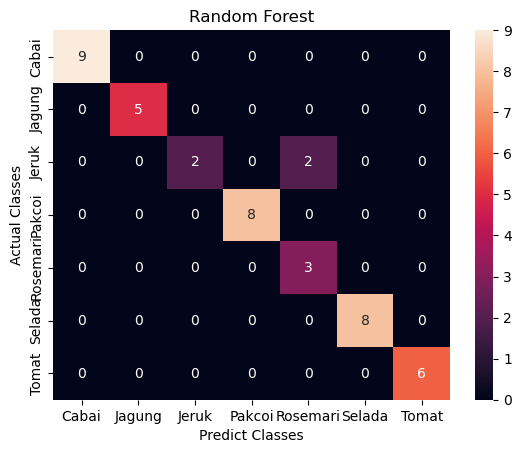

In [25]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
CMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(CMatrix, annot=True)
plt.xticks(np.arange(7)+ 0.5, ["Cabai", "Jagung", "Jeruk", "Pakcoi", "Rosemari", "Selada", "Tomat"])
plt.yticks(np.arange(7)+ 0.5, ["Cabai", "Jagung", "Jeruk", "Pakcoi", "Rosemari", "Selada", "Tomat"])
plt.xlabel("Predict Classes")
plt.ylabel("Actual Classes")
plt.title("Random Forest")
plt.show


In [27]:
c_code = port(a)

In [ ]:
if __name__ == '__main__':
    with open('RandomForest.h', 'w') as file:
        file.write(c_code)

In [ ]:
from micromlgen import port

c_code = port(a)
if __name__ == '__main__':
    with open('RandomForest.h', 'w') as file:
        file.write(c_code)